# Forecasting

This notebook has the forecasting model for predicting the electricity demand. The rto-region-data is used for this. We use Prophet model for this purpose. You can know more about prophet here: https://facebook.github.io/prophet/

### Importing necessary libraries

In [1]:
import eia
import pandas as pd 
import plotly.express as px
import prophet
from sklearn.metrics import mean_absolute_error
import matplotlib

### Loading RTO Data

In [2]:
region_data=eia.loaders.load_dataframe(data="rto-region-data")

In [3]:
region_data[region_data["type"]=="D"].groupby(['period']).sum()

,Unnamed: 0
period,
2022-11-04T06,316642.0
2022-11-04T07,298485.0
2022-11-04T08,283410.0
2022-11-04T09,264248.0
2022-11-04T10,245086.0
...,...
2022-11-11T21,61506.0
2022-11-11T22,52595.0
2022-11-11T23,43684.0


In [4]:
#Convert data type
region_data=region_data[region_data["type"]=="D"].astype({'value':'float'})

In [5]:
#Aggregating Demand for each timestamp
df=region_data[region_data["type"]=="D"].groupby(['period']).sum()

In [6]:
#Converting the dataframe to a format prophet model understands
df1=pd.DataFrame()
df1["y"]=df["value"]
df1["ds"]=df.index

In [7]:
df1

,y,ds
period,,
2022-11-04T06,1129524.0,2022-11-04T06
2022-11-04T07,1097349.0,2022-11-04T07
2022-11-04T08,1077567.0,2022-11-04T08
2022-11-04T09,1076958.0,2022-11-04T09
2022-11-04T10,1101372.0,2022-11-04T10
...,...,...
2022-11-11T21,1362642.0,2022-11-11T21
2022-11-11T22,1358040.0,2022-11-11T22
2022-11-11T23,1371486.0,2022-11-11T23


<AxesSubplot:xlabel='period'>

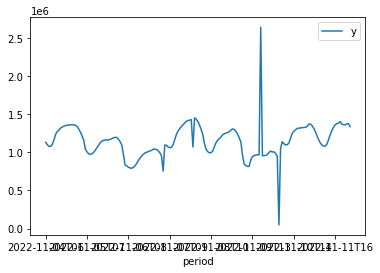

In [8]:
#Visualising the timeseries data
df1.plot()

In [9]:
# Renaming the dataframe to a format prophet model understands
df1=df1.rename(columns={"value":"y"},index={"period":"ds"})

In [10]:
df1.index.names=["index"]

In [11]:
df1=df1.reset_index(drop=True)

### Train Test Split

In [12]:
df1_train,df1_test=df1[:int(0.8*len(df1))], df1[int(0.8*len(df1)):]

In [13]:
df1_test["ds"]

148    2022-11-10T12
149    2022-11-10T13
150    2022-11-10T14
151    2022-11-10T15
152    2022-11-10T16
153    2022-11-10T17
154    2022-11-10T18
155    2022-11-10T19
156    2022-11-10T20
157    2022-11-10T21
158    2022-11-10T22
159    2022-11-11T00
160    2022-11-11T01
161    2022-11-11T02
162    2022-11-11T03
163    2022-11-11T04
164    2022-11-11T05
165    2022-11-11T06
166    2022-11-11T07
167    2022-11-11T08
168    2022-11-11T09
169    2022-11-11T10
170    2022-11-11T11
171    2022-11-11T12
172    2022-11-11T13
173    2022-11-11T14
174    2022-11-11T15
175    2022-11-11T16
176    2022-11-11T17
177    2022-11-11T18
178    2022-11-11T19
179    2022-11-11T20
180    2022-11-11T21
181    2022-11-11T22
182    2022-11-11T23
183    2022-11-12T00
184    2022-11-12T01
Name: ds, dtype: object

### Train the model

In [14]:
model = prophet.Prophet()
model.fit(df1_train)

19:33:05 - cmdstanpy - INFO - Chain [1] start processing
19:33:05 - cmdstanpy - INFO - Chain [1] done processing


In [15]:
model.history

,y,ds,floor,t,y_scaled
0,1129524.0,2022-11-04 06:00:00,0,0.000000,0.428235
1,1097349.0,2022-11-04 07:00:00,0,0.006711,0.416036
2,1077567.0,2022-11-04 08:00:00,0,0.013423,0.408536
3,1076958.0,2022-11-04 09:00:00,0,0.020134,0.408305
4,1101372.0,2022-11-04 10:00:00,0,0.026846,0.417561
...,...,...,...,...,...
143,1137828.0,2022-11-10 07:00:00,0,0.973154,0.431383
144,1111863.0,2022-11-10 08:00:00,0,0.979866,0.421539
145,1097157.0,2022-11-10 09:00:00,0,0.986577,0.415963
146,1098765.0,2022-11-10 10:00:00,0,0.993289,0.416573


### Perform Prediction

In [16]:
preds=model.predict(df1_test)

In [17]:
preds

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-11-10 12:00:00,1.084869e+06,7.547033e+05,1.259218e+06,1.084869e+06,1.084869e+06,-77416.632034,-77416.632034,-77416.632034,-77416.632034,-77416.632034,-77416.632034,0.0,0.0,0.0,1.007452e+06
1,2022-11-10 13:00:00,1.084571e+06,7.628501e+05,1.281542e+06,1.084551e+06,1.084588e+06,-50708.195610,-50708.195610,-50708.195610,-50708.195610,-50708.195610,-50708.195610,0.0,0.0,0.0,1.033863e+06
2,2022-11-10 14:00:00,1.084273e+06,8.027009e+05,1.313878e+06,1.084206e+06,1.084318e+06,-27730.386001,-27730.386001,-27730.386001,-27730.386001,-27730.386001,-27730.386001,0.0,0.0,0.0,1.056543e+06
3,2022-11-10 15:00:00,1.083975e+06,8.361824e+05,1.345869e+06,1.083833e+06,1.084077e+06,5128.209139,5128.209139,5128.209139,5128.209139,5128.209139,5128.209139,0.0,0.0,0.0,1.089103e+06
4,2022-11-10 16:00:00,1.083677e+06,8.905925e+05,1.398298e+06,1.083456e+06,1.083853e+06,58145.300060,58145.300060,58145.300060,58145.300060,58145.300060,58145.300060,0.0,0.0,0.0,1.141822e+06
5,2022-11-10 17:00:00,1.083379e+06,9.464717e+05,1.448678e+06,1.083077e+06,1.083645e+06,120698.577706,120698.577706,120698.577706,120698.577706,120698.577706,120698.577706,0.0,0.0,0.0,1.204078e+06
6,2022-11-10 18:00:00,1.083081e+06,1.002206e+06,1.494781e+06,1.082693e+06,1.083424e+06,162838.172667,162838.172667,162838.172667,162838.172667,162838.172667,162838.172667,0.0,0.0,0.0,1.245919e+06
7,2022-11-10 19:00:00,1.082783e+06,9.834110e+05,1.497769e+06,1.082300e+06,1.083236e+06,158808.587814,158808.587814,158808.587814,158808.587814,158808.587814,158808.587814,0.0,0.0,0.0,1.241592e+06
8,2022-11-10 20:00:00,1.082485e+06,9.397394e+05,1.451508e+06,1.081884e+06,1.083047e+06,112346.797177,112346.797177,112346.797177,112346.797177,112346.797177,112346.797177,0.0,0.0,0.0,1.194832e+06
9,2022-11-10 21:00:00,1.082187e+06,8.701280e+05,1.387479e+06,1.081461e+06,1.082865e+06,58719.632355,58719.632355,58719.632355,58719.632355,58719.632355,58719.632355,0.0,0.0,0.0,1.140907e+06


In [18]:
df1_test=df1_test.reset_index(drop=True)

### Plot and compare the prediction and true value

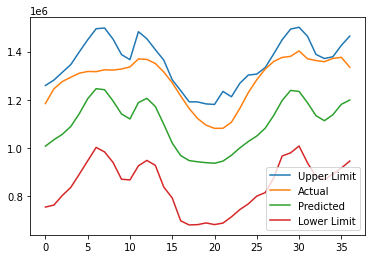

In [19]:
matplotlib.pyplot.plot(preds['yhat_upper'], label='Upper Limit')
matplotlib.pyplot.plot(df1_test['y'], label='Actual')
matplotlib.pyplot.plot(preds['yhat'], label='Predicted')
matplotlib.pyplot.plot(preds['yhat_lower'], label='Lower Limit')
matplotlib.pyplot.legend()
matplotlib.pyplot.show()